# Pymaceuticals Inc.
---

### Analysis

•	The Drug Regimen Capomulin and Ramicane show the smallest tumor volume, and the most considerable tumor volume       shows with the drug regime Ketapril.
•	The Bar chart shows that Capomulin and Ramicane have the maximum mice number with 230 and 228, respectively.
•	The male population is 2% bigger than the female.
•	The correlation between mouse weight and average tumor volume is 0.84. It is a strong positive correlation; the     average tumor volume also increases when the mouse weight increases.

 

In [22]:
# Dependencies and Setup
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files"
Mouse_metadata_path = "Mouse_metadata.csv"
Study_results_path = "Study_results.csv"

# Read the mouse data and the study results
Mouse_metadata = pd.read_csv(Mouse_metadata_path)
Study_results = pd.read_csv(Study_results_path)

# Combine the data into a single DataFrame
# Merge the two DataFrames on 'Mouse ID'
merged_df = pd.merge(Study_results, Mouse_metadata, on='Mouse ID')

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [23]:
# Checking the number of mice.
num_unique_mice = merged_df['Mouse ID'].nunique()
num_unique_mice

249

In [24]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Find duplicate rows based on Mouse ID and Timepoint
duplicate_rows = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'])]

# Get the list of duplicate Mouse IDs
duplicate_mouse_ids = duplicate_rows['Mouse ID'].unique()

duplicate_mouse_ids

array(['g989'], dtype=object)

In [25]:
# Optional: Get all the data for the duplicate mouse ID. 
# Filter the merged DataFrame based on the duplicate Mouse ID
duplicate_mouse_data = merged_df.loc[merged_df['Mouse ID'] == 'g989']

# Convert the resulting data to a DataFrame
duplicate_mouse_data_df = pd.DataFrame(duplicate_mouse_data)
duplicate_mouse_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Drop the rows with duplicate Mouse ID 'g989'
clean_df = merged_df.drop_duplicates(subset=['Mouse ID'], keep=False).reset_index(drop=True)

# Print the first 5 rows of the clean DataFrame
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.0,0,Ketapril,Male,15,29
1,x336,0,45.0,0,Naftisol,Female,4,29
2,h428,0,45.0,0,Ketapril,Female,1,27
3,v199,0,45.0,0,Naftisol,Female,17,29
4,o848,0,45.0,0,Stelasyn,Female,14,27


In [27]:
clean_df = merged_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep=False).reset_index(drop=True)

In [28]:
# Checking the number of mice in the clean DataFrame.
# Get the number of unique mouse IDs in the clean DataFrame
num_mice = clean_df['Mouse ID'].nunique()
num_mice

249

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Group the clean DataFrame by drug regimen and calculate the desired summary statistics
# Group the clean DataFrame by drug regimen
regimen_groups = clean_df.groupby('Drug Regimen')

# Calculate the mean, median, variance, standard deviation, and SEM of tumor volume for each regimen
tumor_volume_mean = regimen_groups['Tumor Volume (mm3)'].mean()
tumor_volume_median = regimen_groups['Tumor Volume (mm3)'].median()
tumor_volume_var = regimen_groups['Tumor Volume (mm3)'].var()
tumor_volume_std = regimen_groups['Tumor Volume (mm3)'].std()
tumor_volume_sem = regimen_groups['Tumor Volume (mm3)'].sem()

# Create a new DataFrame to store the summary statistics
summary_df = pd.DataFrame({
    'Mean Tumor Volume': tumor_volume_mean,
    'Median Tumor Volume': tumor_volume_median,
    'Tumor Volume Variance': tumor_volume_var,
    'Tumor Volume Std. Dev.': tumor_volume_std,
    'Tumor Volume Std. Err.': tumor_volume_sem
})

# Print the summary statistics DataFrame
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Use groupby() and agg() functions to calculate the summary statistics in one line
summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Tumor Volume Variance', 'std': 'Tumor Volume Std. Dev.', 'sem': 'Tumor Volume Std. Err.'})

# Print the summary statistics DataFrame
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

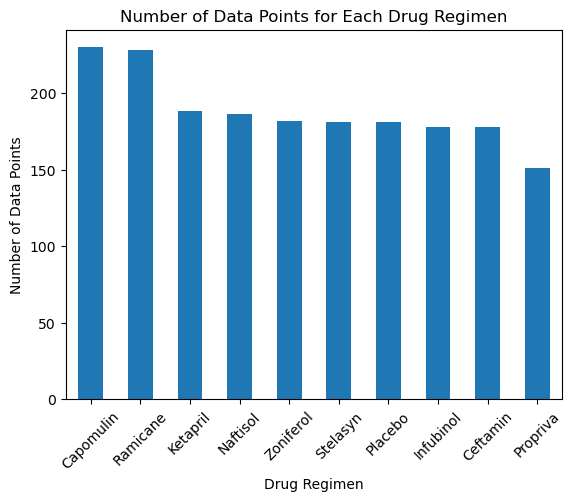

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Count the number of rows for each drug regimen
regimen_counts = clean_df['Drug Regimen'].value_counts()

# Create a bar plot of the regimen counts
regimen_counts.plot(kind='bar', rot=45)

# Set the title and axis labels
plt.title('Number of Data Points for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')

# Display the plot
plt.show()

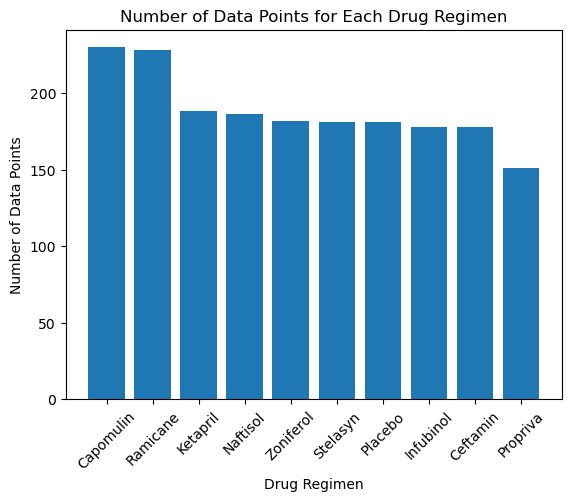

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Count the number of rows for each drug regimen
regimen_counts = clean_df['Drug Regimen'].value_counts()

# Create a bar plot of the regimen counts
plt.bar(regimen_counts.index, regimen_counts.values)

# Set the title and axis labels
plt.title('Number of Data Points for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

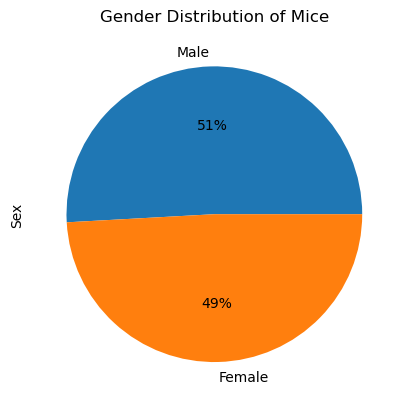

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of male and female mice
gender_counts = clean_df['Sex'].value_counts()

# Create a pie plot of the gender distribution
gender_counts.plot(kind='pie', autopct='%.0f%%', startangle=360)

# Set the title
plt.title('Gender Distribution of Mice')

# Display the plot
plt.show()

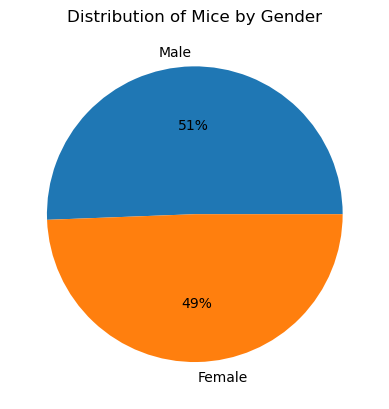

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count the number of occurrences of each gender
gender_counts = merged_df['Sex'].value_counts()

# Create a pie plot of the gender distribution using pyplot
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%.0f%%')

# Set the plot title
plt.title('Distribution of Mice by Gender')

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Get the last (greatest) timepoint for each mouse
max_timepoints = clean_df.groupby('Mouse ID')['Timepoint'].max()

# Create a new DataFrame with the last timepoint for each mouse
last_timepoints = pd.DataFrame(max_timepoints).reset_index()

# Merge the new DataFrame with the clean DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoints, clean_df, on=['Mouse ID', 'Timepoint'])

# Select only the four treatment regimens of interest
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = merged_df.loc[merged_df['Drug Regimen'].isin(treatment_regimens)]


In [36]:
    
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through treatments to calculate IQR and identify potential outliers
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Calculate quartiles, IQR, and upper and lower bounds
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Append results to tumor_vol_data list
    tumor_vol_data.append(outliers)
    
    # Print results for each treatment
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


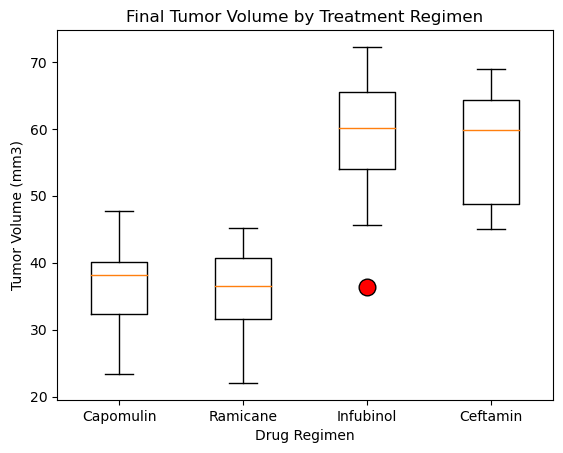

In [37]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a list of tumor volumes for each treatment
tumor_volumes = [final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"] for treatment in treatments]

# Create a box plot using pyplot
fig, ax = plt.subplots()
ax.boxplot(tumor_volumes, labels=treatments, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 12, 'markeredgewidth': 1})

# Set plot title and axis labels
ax.set_title("Final Tumor Volume by Treatment Regimen")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")

# Display the plot
plt.show()

## Line and Scatter Plots

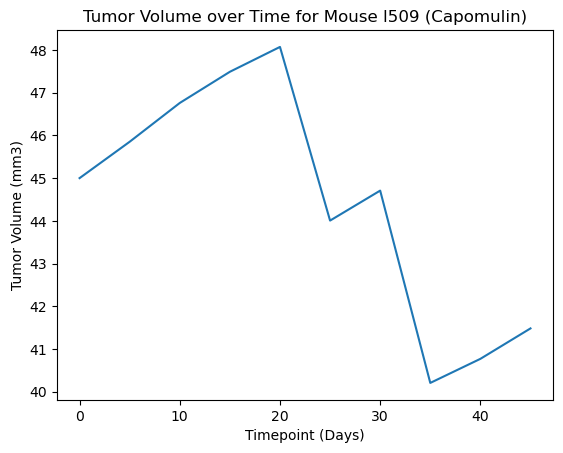

In [38]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Select a single mouse treated with Capomulin
mouse_id = "l509"
capomulin_mouse = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") & (clean_df["Mouse ID"] == mouse_id)]

# Create a line plot using pyplot
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])

# Set plot title and axis labels
plt.title(f"Tumor Volume over Time for Mouse {mouse_id} (Capomulin)")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Display the plot
plt.show()

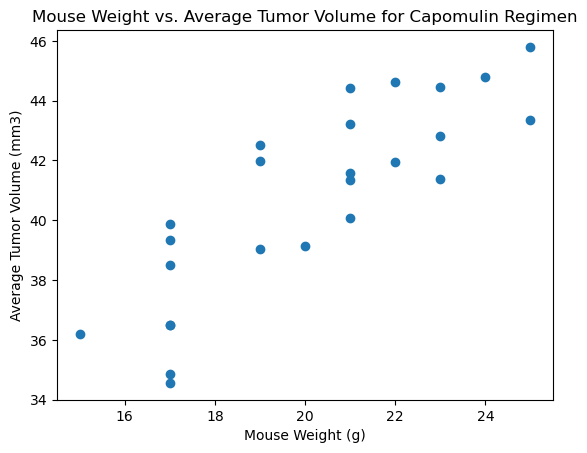

In [39]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Select only Capomulin regimen data
capomulin_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
avg_tumor_vol = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the weight of each mouse
mouse_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()

# Create a scatter plot using pyplot
plt.scatter(mouse_weight, avg_tumor_vol)

# Set plot title and axis labels
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display the plot
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


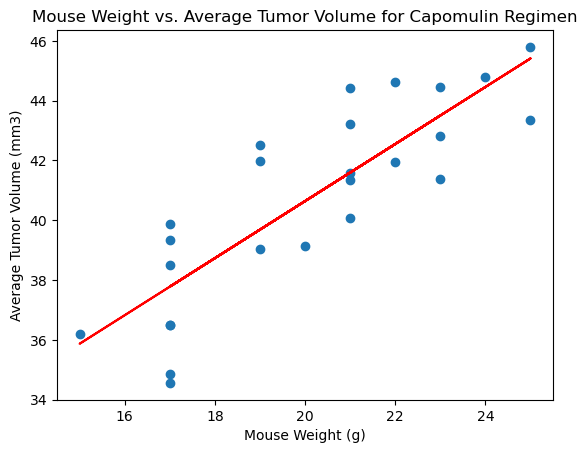

In [40]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Select only Capomulin regimen data
from scipy.stats import linregress
capomulin_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
avg_tumor_vol = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the weight of each mouse
mouse_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()

# Calculate the correlation coefficient using pearsonr
correlation = st.pearsonr(mouse_weight, avg_tumor_vol)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

# Perform linear regression and plot the line on the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor_vol)
regress_values = mouse_weight * slope + intercept
plt.scatter(mouse_weight, avg_tumor_vol)
plt.plot(mouse_weight, regress_values, "r-")

# Set plot title and axis labels
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display the plot
plt.show()